In [ ]:
!pip install pillow
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 135kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving elliptical.jpg to elliptical.jpg


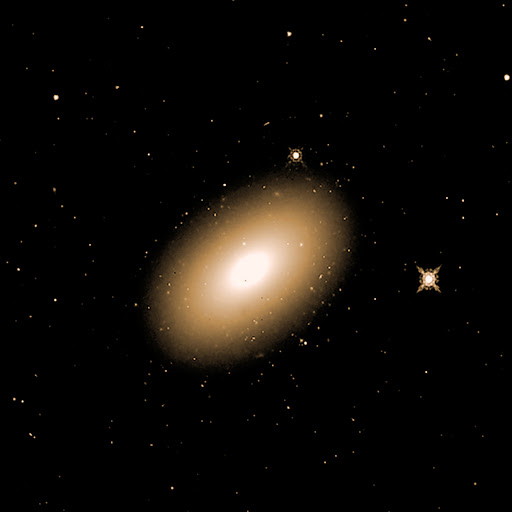

In [ ]:
Image("elliptical.jpg", width=100)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn
from tensorflow import keras
from tensorflow.keras import preprocessing, layers
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing import image
from keras.layers.normalization import BatchNormalization
image_shape=(227,227,3)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/galaxy

/content/drive/MyDrive/Colab Notebooks/galaxy


In [ ]:

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), activation='relu', strides=(4,4), padding='valid', input_shape=image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), activation='relu', strides=(1,1), padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    # flatten the image pixels
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(4096, input_shape=(227*227*3,), activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # 1000 neuron fully connected hidden layer
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.load_weights("/content/drive/MyDrive/Colab Notebooks/ourmodel.h5")

In [ ]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/galaxy/galaxy_images/',
        target_size=(227, 227),
        batch_size=445)

Found 0 images belonging to 1 classes.


In [ ]:
import scipy.misc
img_names=['elliptical.jpg']


In [ ]:
arr="/content/drive/MyDrive/Colab Notebooks/galaxy/galaxy_images/"
for i in arr[1:10]:
  shutil.copyfile(os.path.join(arr, str(i)+'.png'), os.path.join("test", str(i)+'.png'))
print(label, 'done!')

In [ ]:

def load_label_names():
    return ['Elliptical', 'Lenticular', 'Spiral']

In [ ]:
from sklearn.preprocessing import LabelBinarizer

def display_image_predictions(features, labels, predictions):
    n_classes = 3
    label_names = load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axs = plt.subplots(10, 2, figsize=(12,24))

    margin = 0.05
    ind = np.arange(n_classes)
    width = (1. - 2. * margin) / n_classes    
    
    for image_i, (feature, label_id, prediction) in enumerate(zip(features, label_ids, predictions)):
        correct_name = label_names[label_id]
        pred_name = label_names[np.argmax(prediction)]
        
        is_match = 'False'        
        
        if np.argmax(prediction) == label_id:
            is_match = 'True'
            
        predictions_array = []
        pred_names = []
        
        for index, pred_value in enumerate(prediction):
            tmp_pred_name = label_names[index]
            predictions_array.append({tmp_pred_name : pred_value})
            pred_names.append(tmp_pred_name)
        
        print('[{}] ground truth: {}, predicted result: {} | {}'.format(image_i, correct_name, pred_name, is_match))
        
        axs[image_i][0].imshow(feature)
        axs[image_i][0].set_title(pred_name)
        axs[image_i][0].set_axis_off()
        
        axs[image_i][1].barh(ind + margin, prediction, width)
        axs[image_i][1].set_yticks(ind + margin)
        axs[image_i][1].set_yticklabels(pred_names)
    plt.tight_layout()

In [ ]:

        for feature in random_test_features:
            tmpFeature = skimage.transform.resize(feature, (224, 224), mode='constant')
            tmpTestFeatures.append(tmpFeature)
           
        random_test_predictions = sess.run(
            tf.nn.softmax(loaded_logits),
            feed_dict={loaded_x: tmpTestFeatures, loaded_y: random_test_labels})
        
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)

test_model(tmpFeatures)

In [ ]:
imgs=scipy.misc.imresize(imgs,(180,180))
model.predict_classes(imgs.reshape(1,180,180,3))

In [ ]:
imgs=scipy.misc.imread('/content/elliptical.jpg')
imgs=scipy.misc.imresize(imgs,(227,227))
model.predict_classes(imgs.reshape(1,227,227,3))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1])